In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [7]:
df["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

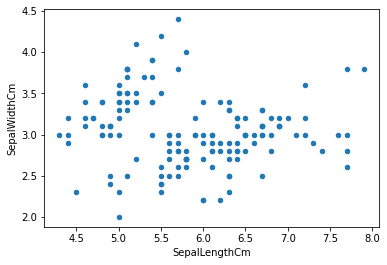

In [11]:
df.plot(kind = "scatter",x="SepalLengthCm",y="SepalWidthCm")
plt.show()

from the above plot it can be clearly seen that the one chuck of Species is clearly seperated from the rest but we don't know which one

C:\Users\vishi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

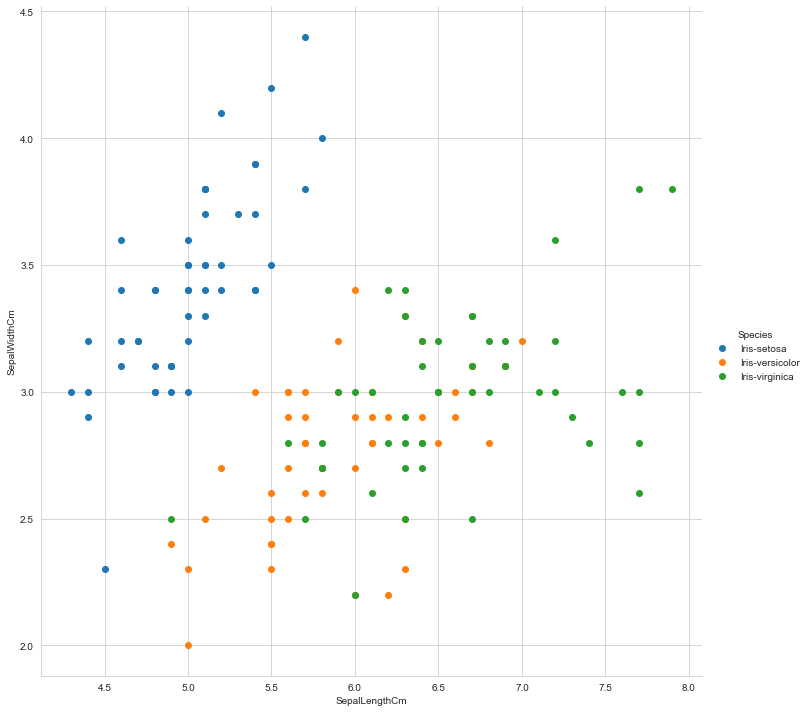

In [24]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="Species",size=10).map(plt.scatter,"SepalLengthCm","SepalWidthCm").add_legend()
plt.show
#print(df.corr)

1. from the above scatter plot now we can clearly see that Iris-Setosa is well seperated from the other species
2. Using SepalLengthCm and SepalWidthCm as a feature we easily distinguish between Setosa and other species
3. Seperating verginica and versicolor is still harder to seperate because of the considerable overlap 

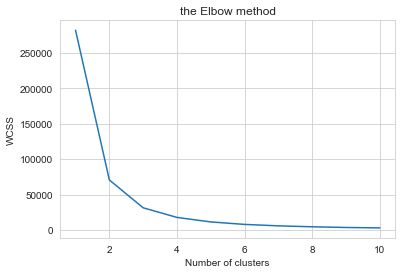

In [32]:
x = df.iloc[:,[0,1,2,3]].values
wcss = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters = i,init = "k-means++", max_iter= 300,random_state = 0)
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("the Elbow method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

1. from the above graph we can clealy see that why it is called the "elbow method". 
2. the optimum cluster is where the elobow occurs
3. We can clearly see that the elbow occurs at Somewher between 2 & 4. let take it 3
4. this is the point where the sum of squares doesn't decrease much with every iteration

In [43]:
Kmeans = KMeans(n_clusters = 3,init = "k-means++", max_iter= 300,n_init=5,random_state = 0)
y_means = Kmeans.fit_predict(x)

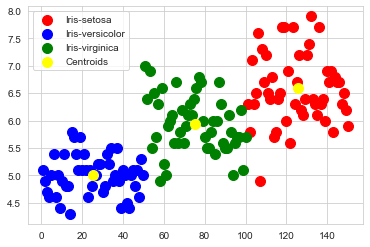

In [44]:
plt.scatter(x[y_means == 0,0],x[y_means == 0,1],s=100,c="red",label = "Iris-setosa")
plt.scatter(x[y_means == 1,0],x[y_means == 1,1],s=100,c="blue",label = "Iris-versicolor")
plt.scatter(x[y_means == 2,0],x[y_means == 2,1],s=100,c="green",label = "Iris-virginica")

plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s=100,c="yellow",label = "Centroids")

plt.legend()